In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("./clean_cityname.txt", "r") as f:
    str = f.read()
map = eval(str)

map = np.array(map)
map.shape

FileNotFoundError: [Errno 2] No such file or directory: './clean_cityname.txt'

TypeError: Image data of dtype object cannot be converted to float

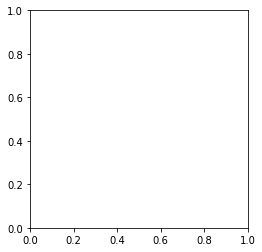

In [3]:
plt.imshow(map)

In [4]:
with open("./cityname.txt", "r") as f:
    str = f.read()
    str = str.replace(",}", ")").replace("{","(").replace("1'b", "")
    with open("./clean_cityname.txt", "w") as out:
        out.write(str)

In [5]:
title_img = cv2.imread("./title.jpg")
title_img = cv2.cvtColor(title_img, cv2.COLOR_BGR2GRAY)
cv2.imshow("img", title_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

  0%|          | 0/640 [00:00<?, ?it/s]

array([[3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       ...,
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.]])

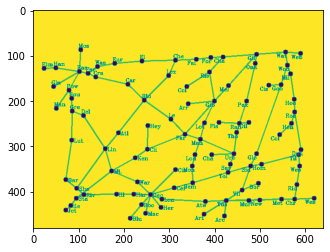

In [7]:
from tqdm.notebook import trange
map_img = cv2.imread("./map.bmp")
map_2bit = np.zeros((480, 640))
for x in trange(640):
    for y in range(480): # BGR
        if (map_img[y,x] == [255, 255, 255]).all():
            map_2bit[y,x] = 3
        if (map_img[y,x] == [0,0,0]).all():
            map_2bit[y,x] = 0
        if (map_img[y,x] == [255,0,0]).all():
            map_2bit[y,x] = 1
        if (map_img[y,x] == [0,0,255]).all():
            map_2bit[y,x] = 2
plt.imshow(map_2bit)
map_2bit

In [8]:
train_img = cv2.imread("./train.jpg")
train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
cv2.imshow("img", train_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(array([ 27362.,      0.,      0.,   9426.,      0.,      0.,   8789.,
             0.,      0., 261623.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

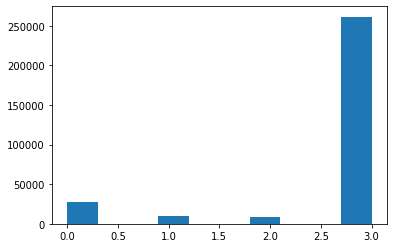

In [9]:
train_img = cv2.imread("./train2.jpg")
train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
train_img = ((train_img / 256) * 4).astype(int)
# plt.imshow(train_img)
plt.hist(train_img.reshape(-1))

In [10]:
def generate(bitwidth=2,data=None, output=None, varname="DATA"):
    assert data is not None, "please provide data"
    assert output is not None, "please provide output filename"
    h = data.shape[0]-1
    w = data.shape[1]-1
    if bitwidth == 1:
        str = f"parameter [{h}:0][{w}:0] {varname}="
    else:
        str = f"parameter [{h}:0][{w}:0][{bitwidth-1}:0] {varname}="
    str += "{"
    for row in data:
        row_str = "{"
        for pixel in row:
            if bitwidth > 1:
                row_str += f"{bitwidth}'d{int(pixel)},"
            else:
                row_str += f"{bitwidth}'b{int(pixel)},"
        row_str += "},"
        str += row_str + "\n"
    str += "};\n"
    with open(output, "w") as f:
        f.write(str)
    print("done")
generate(bitwidth=2, data=train_img, output="./train_img_2bit.txt", varname="maplist")

done


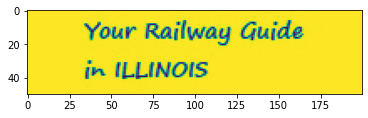

In [11]:
plt.imshow(title_img)